### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import statsmodels.stats.proportion as sp

### Import dataset

In [2]:
df = pd.read_csv(r"C:\Users\user\Downloads\Training Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


## EDA

In [3]:
# Change replace inappropriate data type
df['Id'] = df['Id'].astype(str)

In [4]:
# Check duplicated data
df.duplicated().sum()

0

In [5]:
df.Risk_Flag.value_counts().to_frame().T

,0,1
Risk_Flag,221004,30996


In [6]:
# Split columns into data numeric and category
category = ["Married/Single", "House_Ownership", "Car_Ownership", "Profession", "CITY", "STATE"]
numerical = ["Income", "Age", "Experience", "CURRENT_JOB_YRS", "CURRENT_HOUSE_YRS", "Risk_Flag"]

### Check the numeric columns distribution visualization
* Histogram = the stack of each features
* Boxplots = check outliers
* KDE Plot = normal or bimodal data distribution
* Violin Plot = A combination of Boxplot and Histogram to get information on data distribution
* ECDF = the cumulative proportion of data

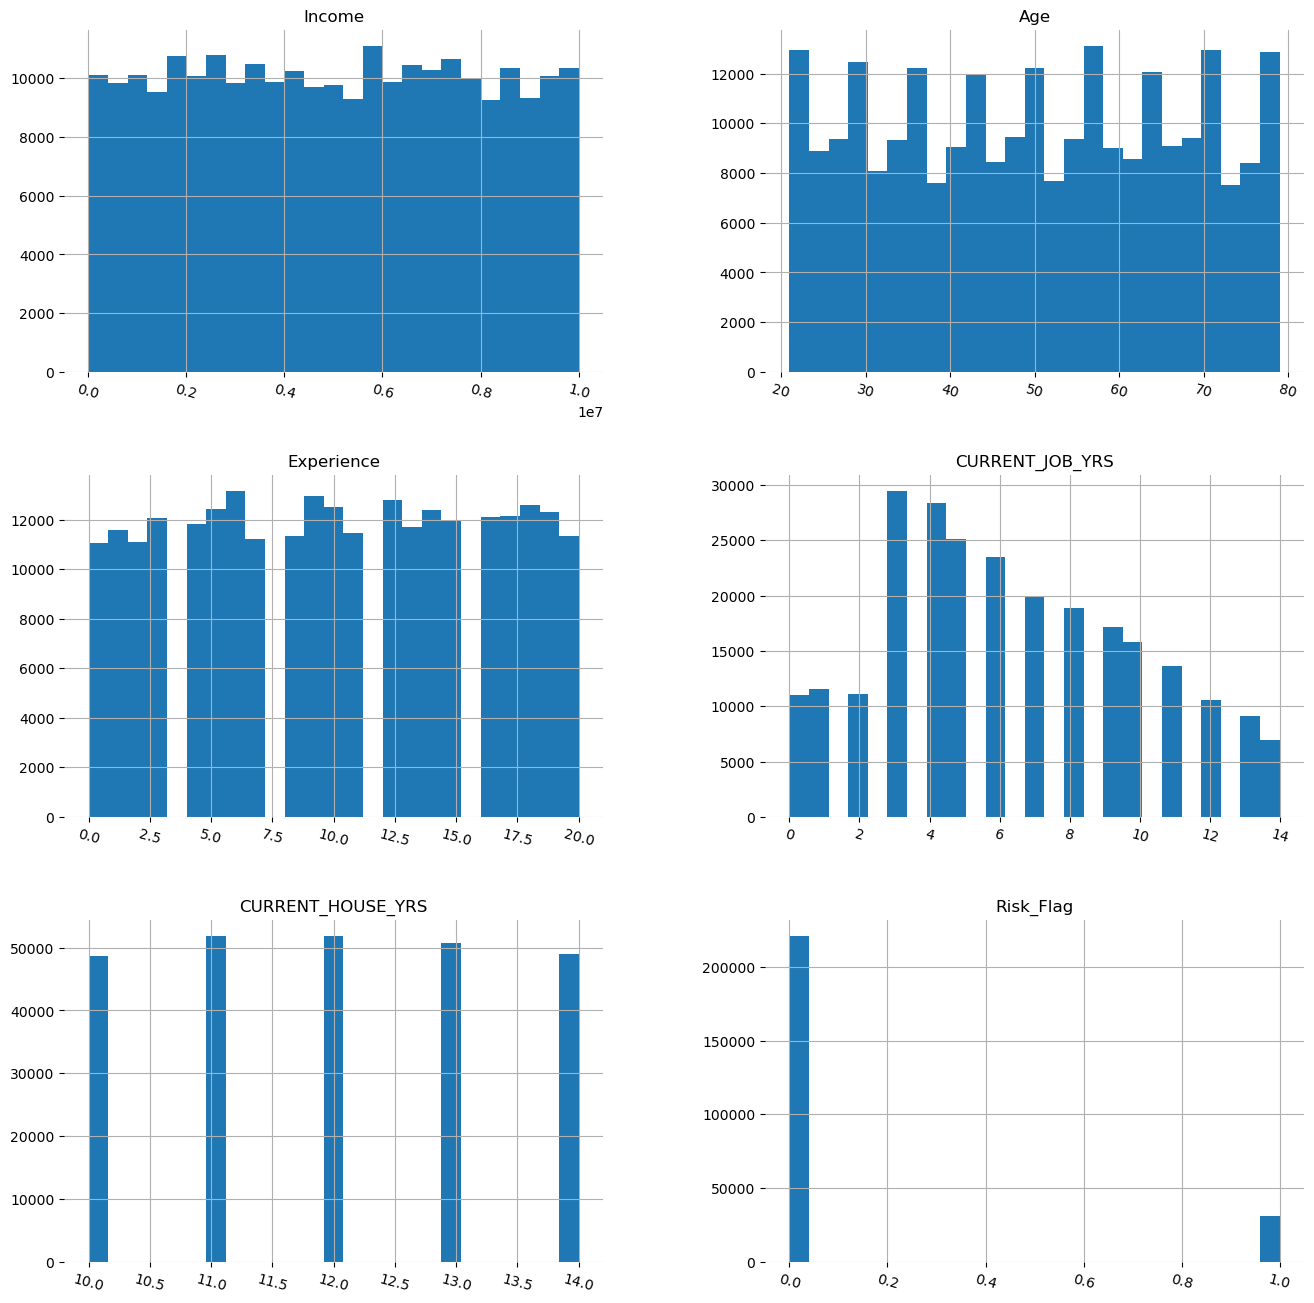

In [7]:
h = df.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

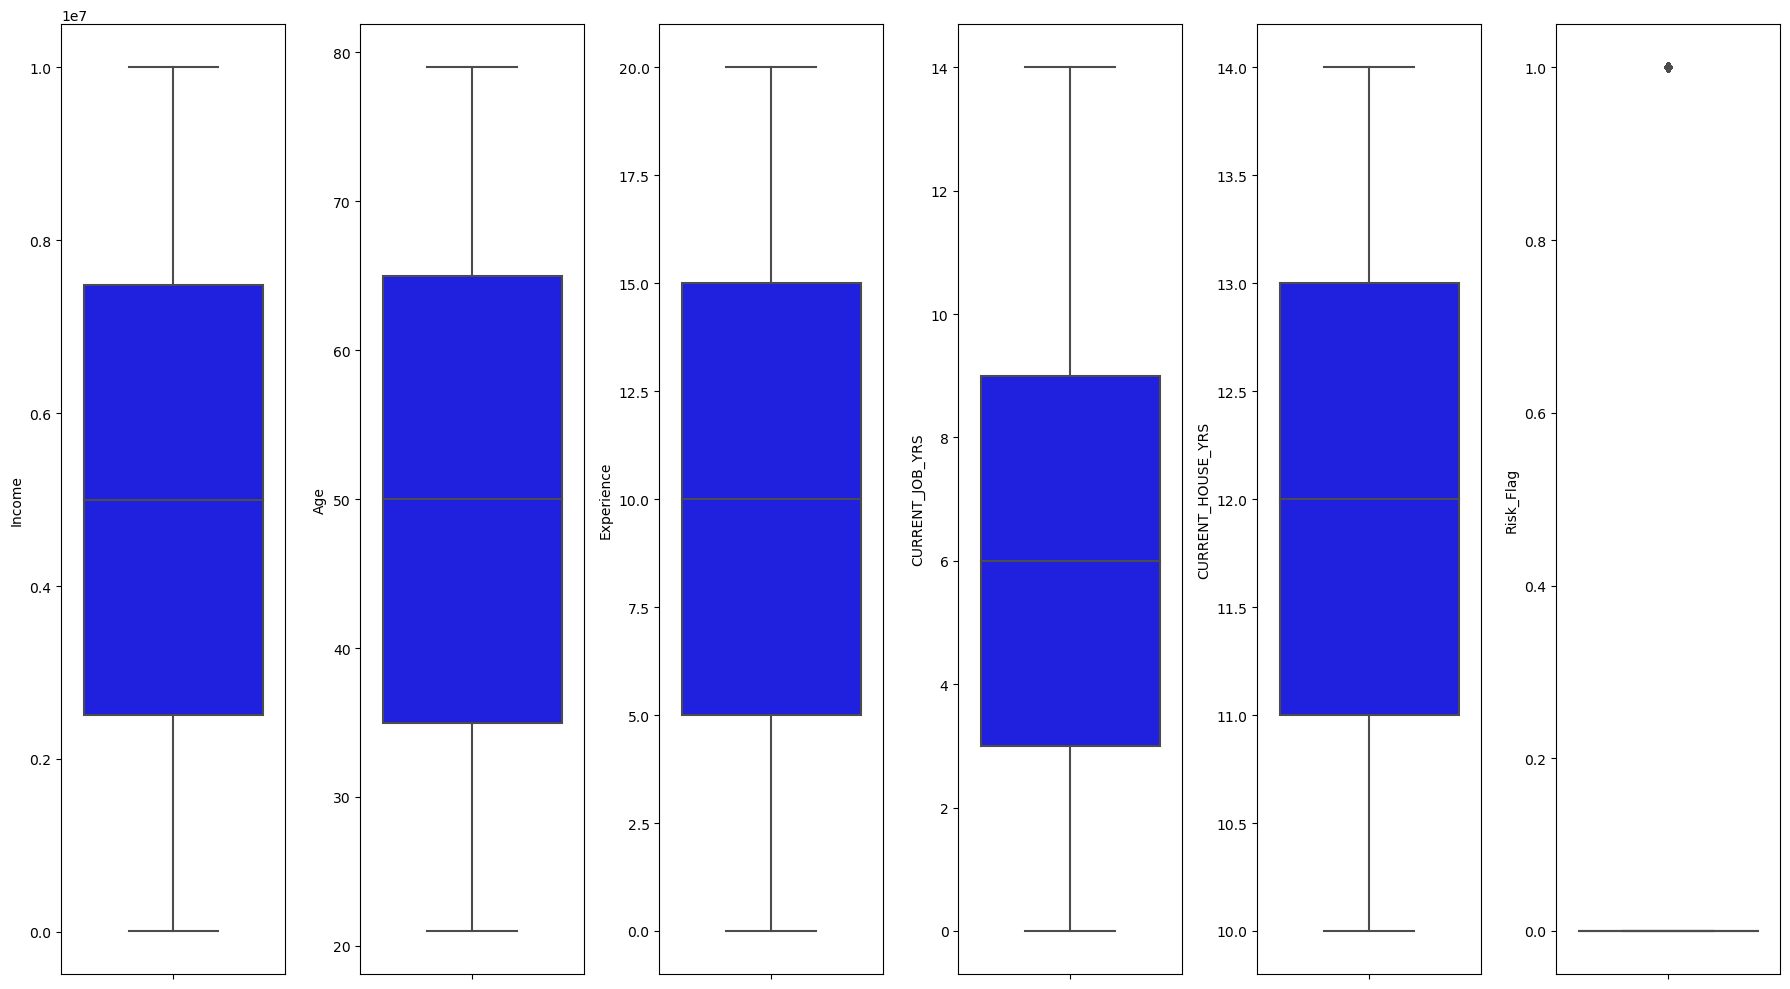

In [8]:
# With Boxplot
feature = numerical

plt.figure(figsize=(18, 10))
for i in range(0,len(feature)):
    plt.subplot(1, len(feature), i+1)
    sns.boxplot(y=df[feature[i]], color='blue', orient='v')
    plt.tight_layout()

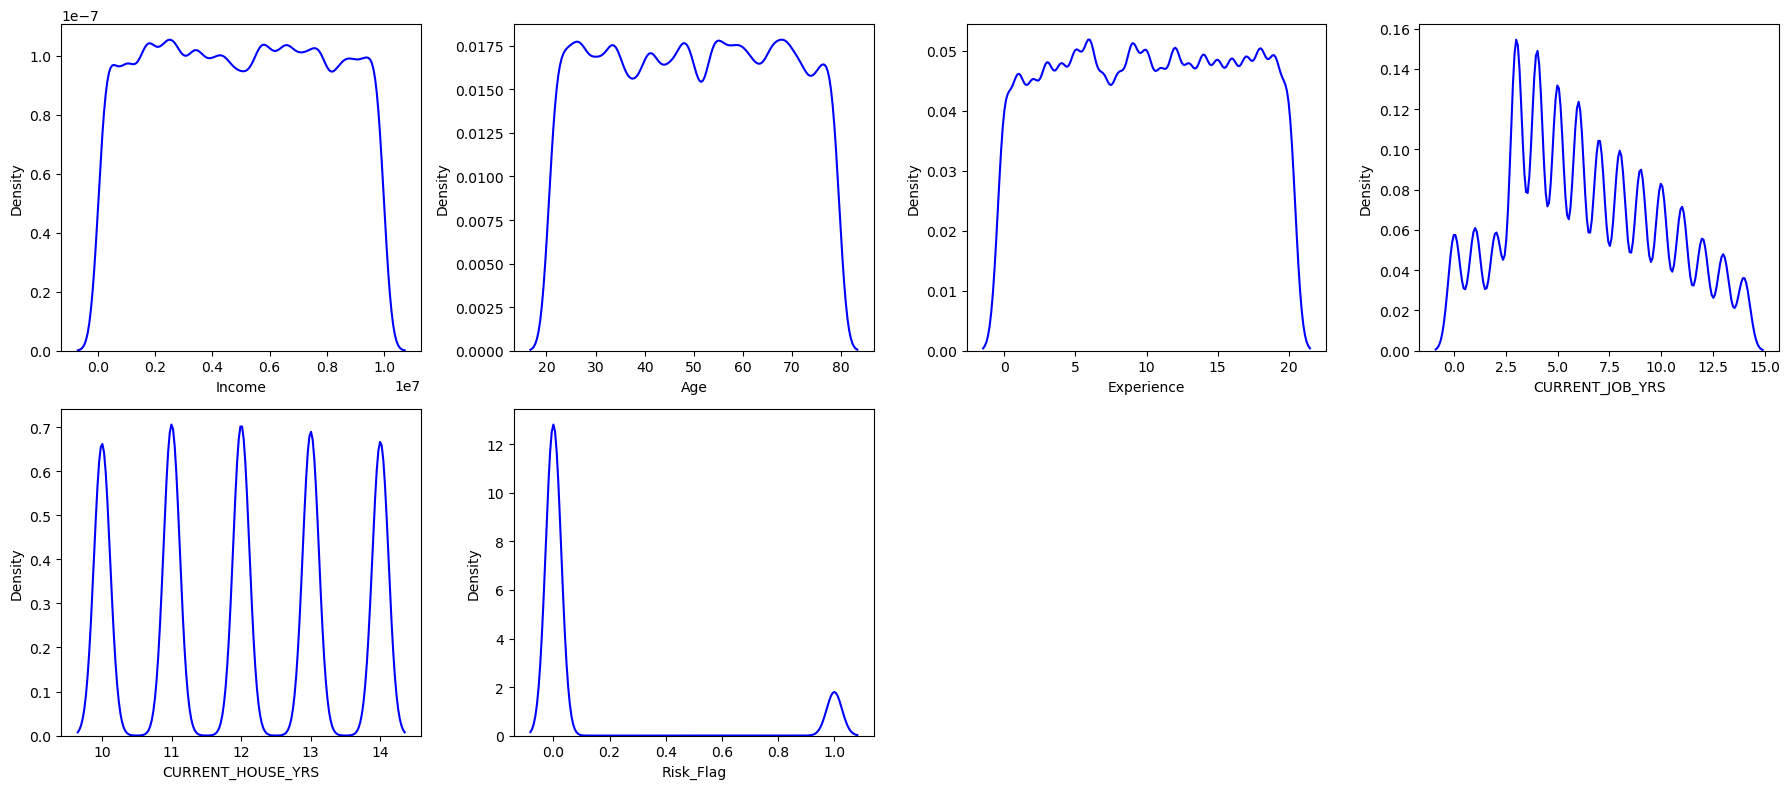

In [9]:
# KDE distribution
feature = numerical

plt.figure(figsize=(18, 8))
for i in range(0, len(feature)):
    plt.subplot(2,4, i+1)
    sns.kdeplot(x=df[feature[i]], color='blue')  
    plt.xlabel(feature[i])
    plt.tight_layout()

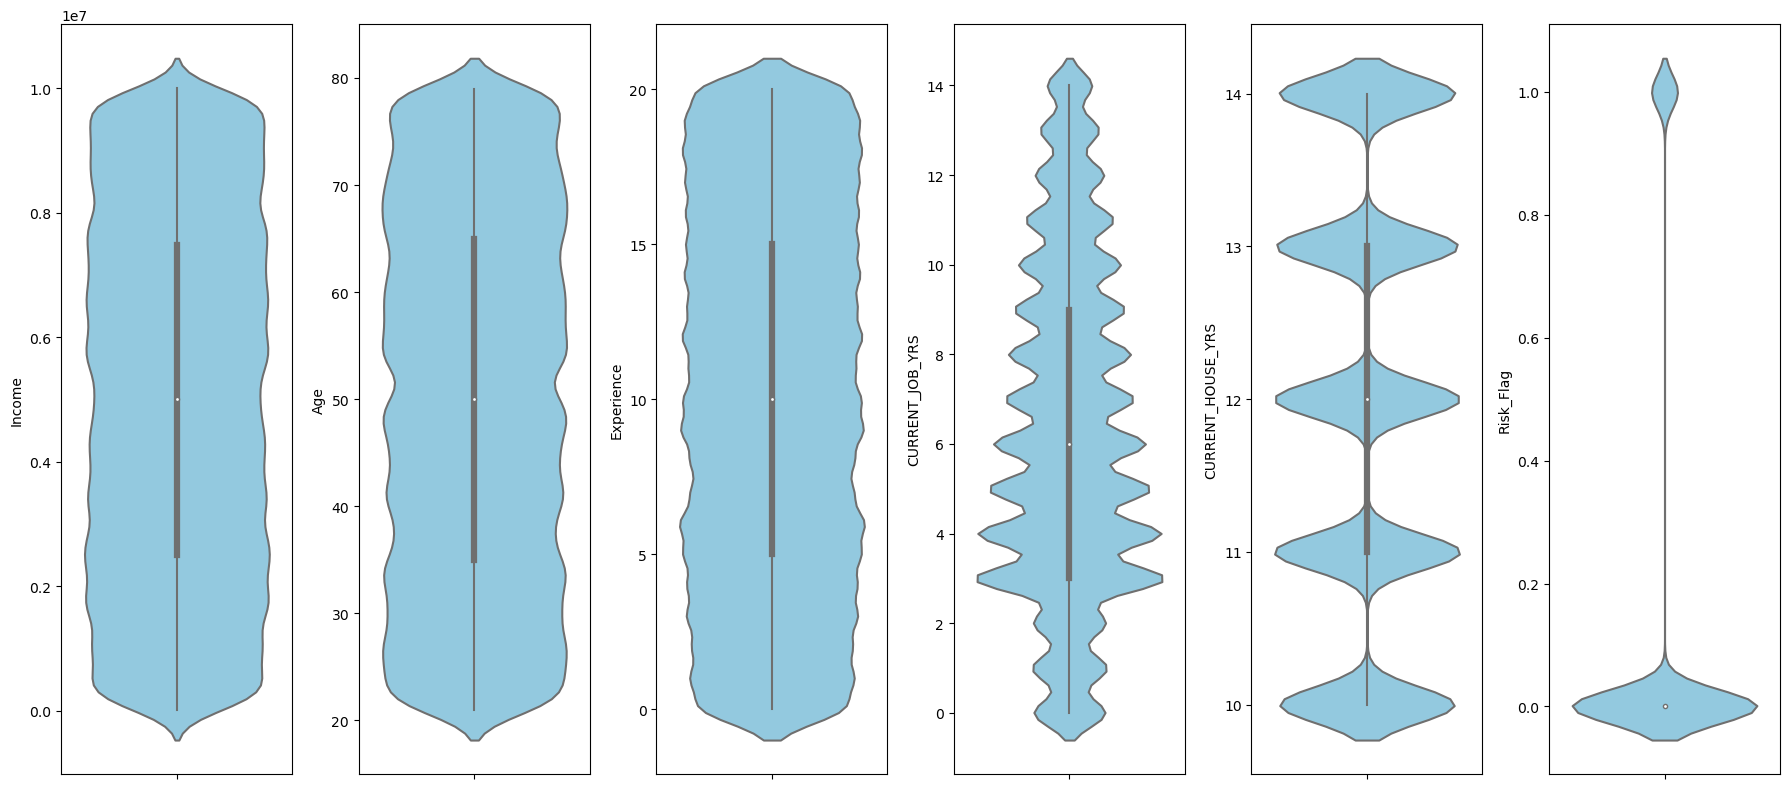

In [10]:
# Violin plot
feature = numerical

plt.figure(figsize=(18, 8))
for i in range(0,len(feature)):
    plt.subplot(1, len(feature), i+1)
    sns.violinplot(y=df[feature[i]], color='skyblue')
    plt.tight_layout()

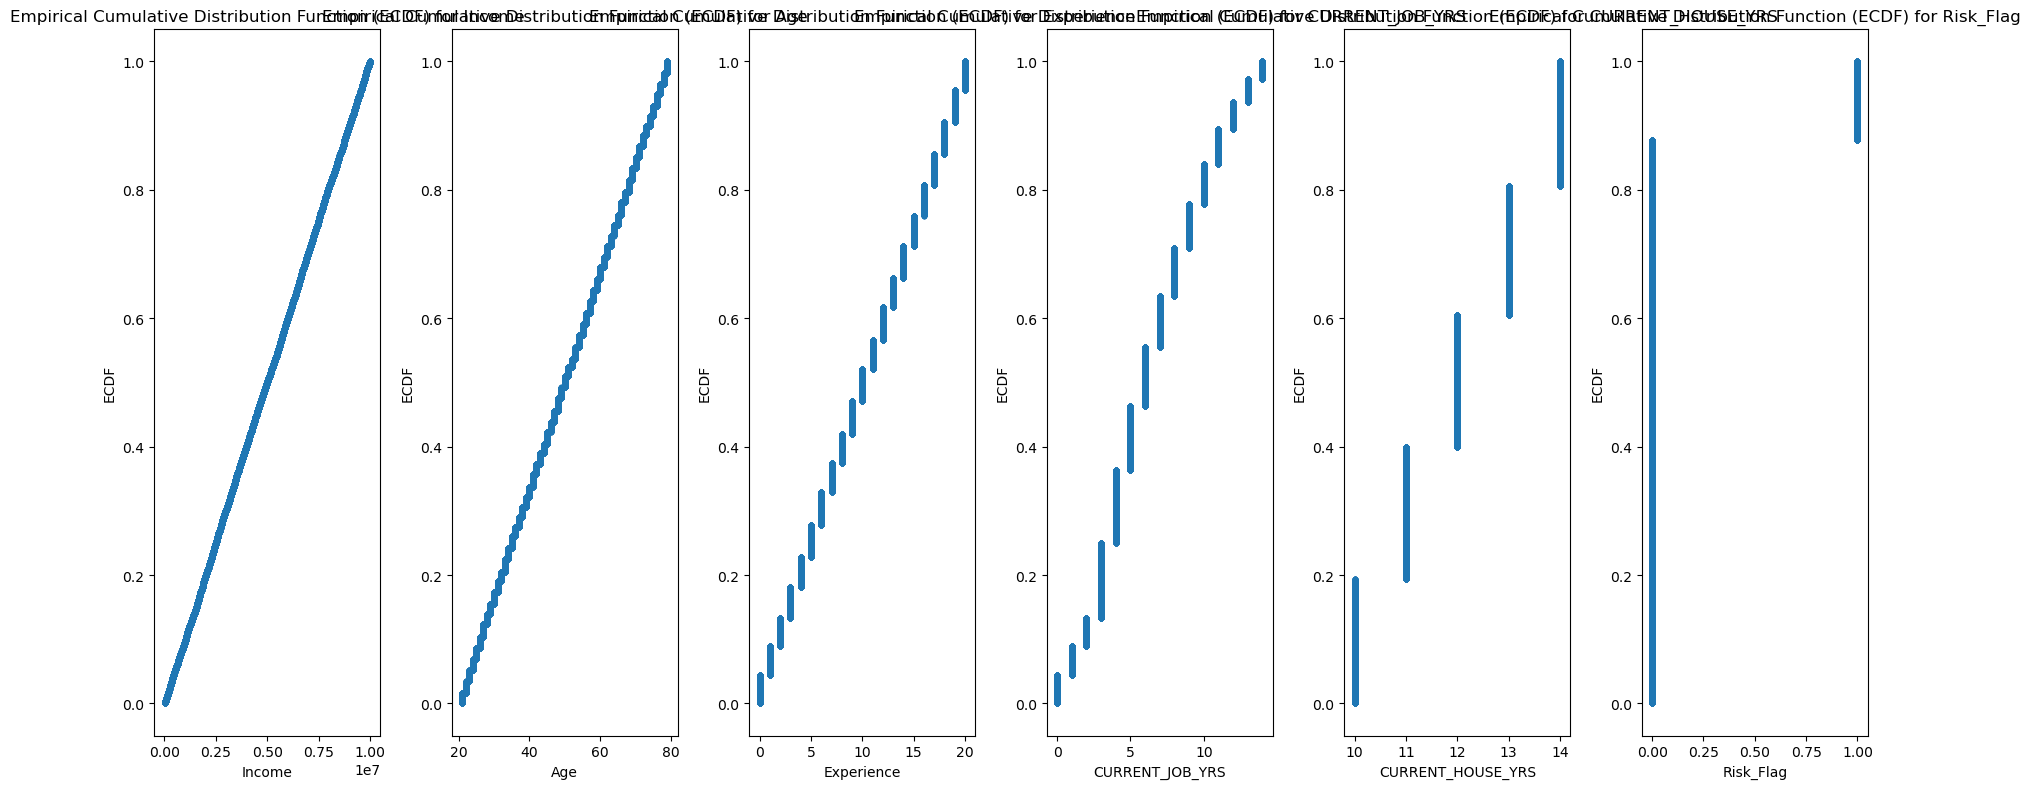

In [11]:
# ECDF distribution
plt.figure(figsize=(18, 8))
for i in range(0,len(feature)):
    plt.subplot(1, len(feature), i+1)
    
    sorted_data = np.sort(df[feature[i]])
    n = len(df[feature[i]])
    y = np.arange(1, n+1) / n

    plt.plot(sorted_data, y, marker='.', linestyle='none')
    
    plt.xlabel(feature[i])
    plt.ylabel('ECDF')
    plt.title(f'Empirical Cumulative Distribution Function (ECDF) for {feature[i]}')

    plt.tight_layout()

plt.show()

### Check the categorical columns distribution visualization

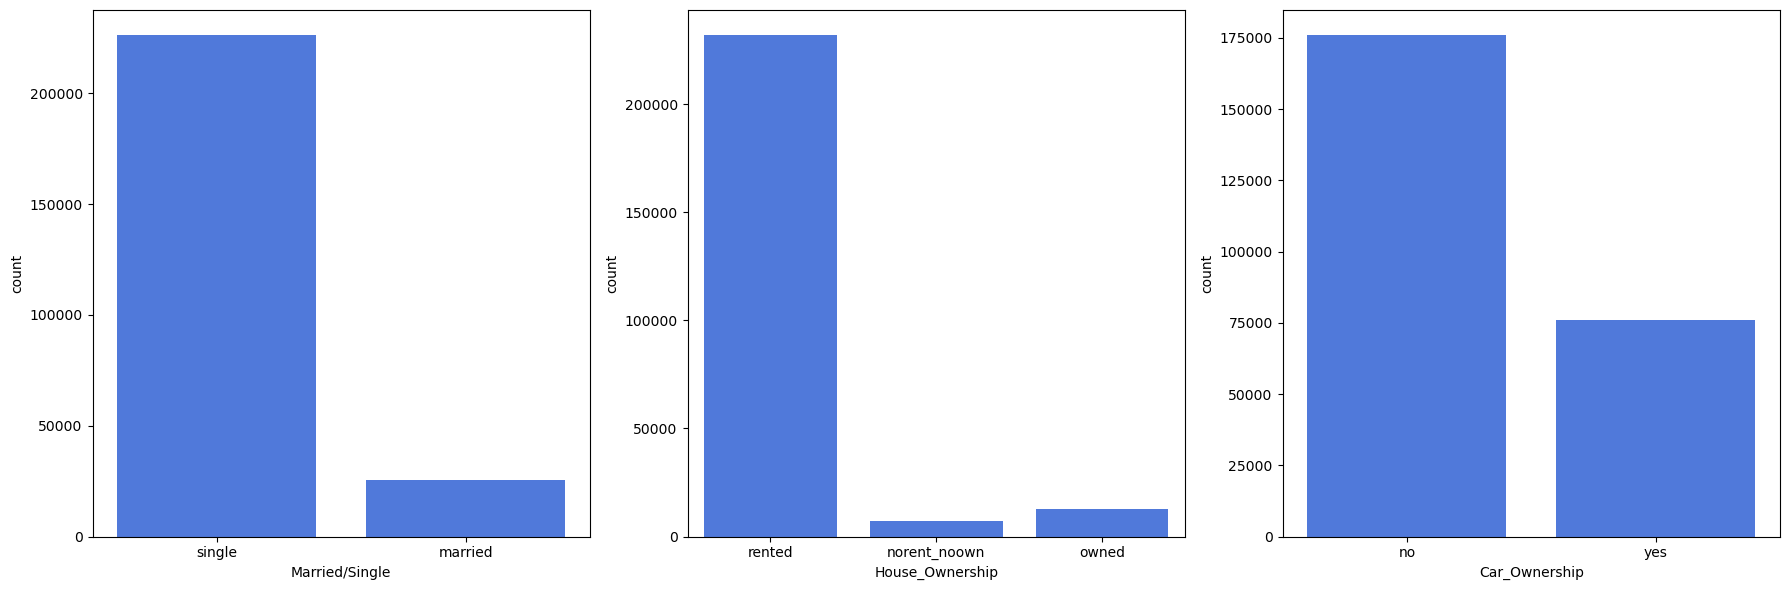

In [12]:
# Horizontal Vertical
plt.figure(figsize=(18, 6))
categorical = ["Married/Single", "House_Ownership", "Car_Ownership"]
features=categorical

for i in range(len(features)):
    plt.subplot(1, len(features), i+1)
    sns.countplot(x=df[features[i]], color='#3970F1')
    plt.tight_layout()
plt.show()

### Multivariate Analysis

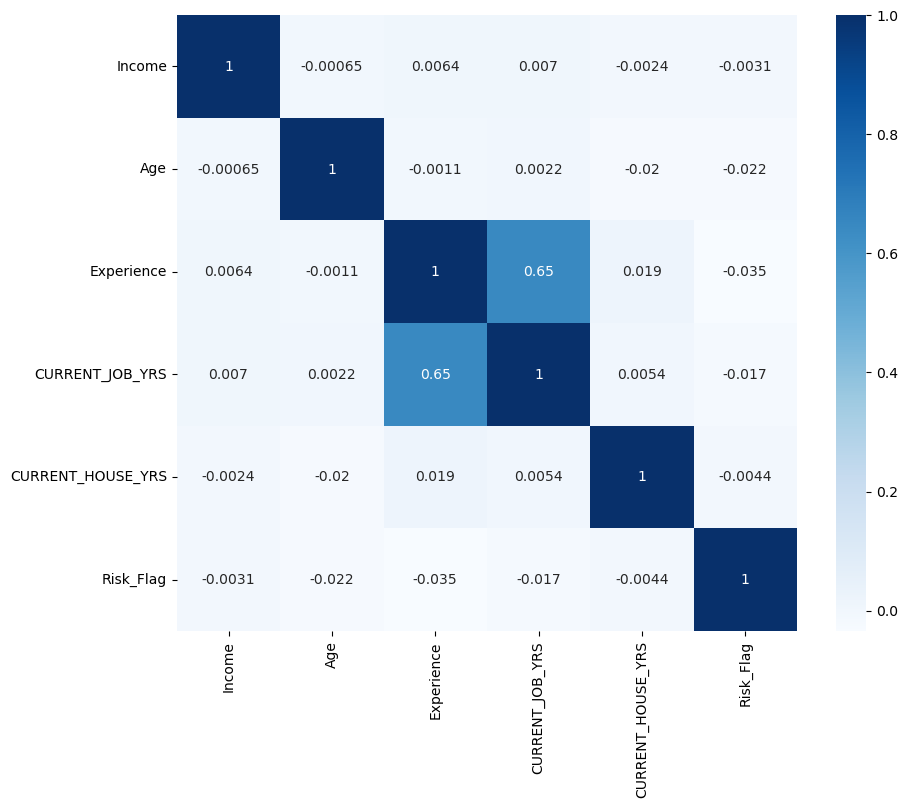

In [13]:
# Correlation in numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical].corr(), cmap='Blues', annot=True)
plt.show()

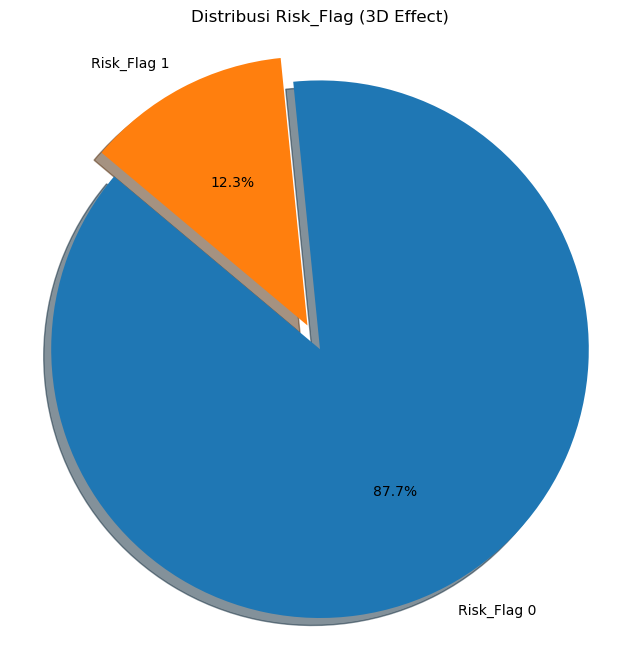

In [14]:
# Check the target
risk_counts = df['Risk_Flag'].value_counts()

labels = ['Risk_Flag 0', 'Risk_Flag 1']
sizes = risk_counts.values
explode = (0.1, 0)  

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)
plt.title('Distribusi Risk_Flag (3D Effect)')
plt.axis('equal')  
plt.show()

### Analysis

#### Risk Rate Analysis Based on Profession

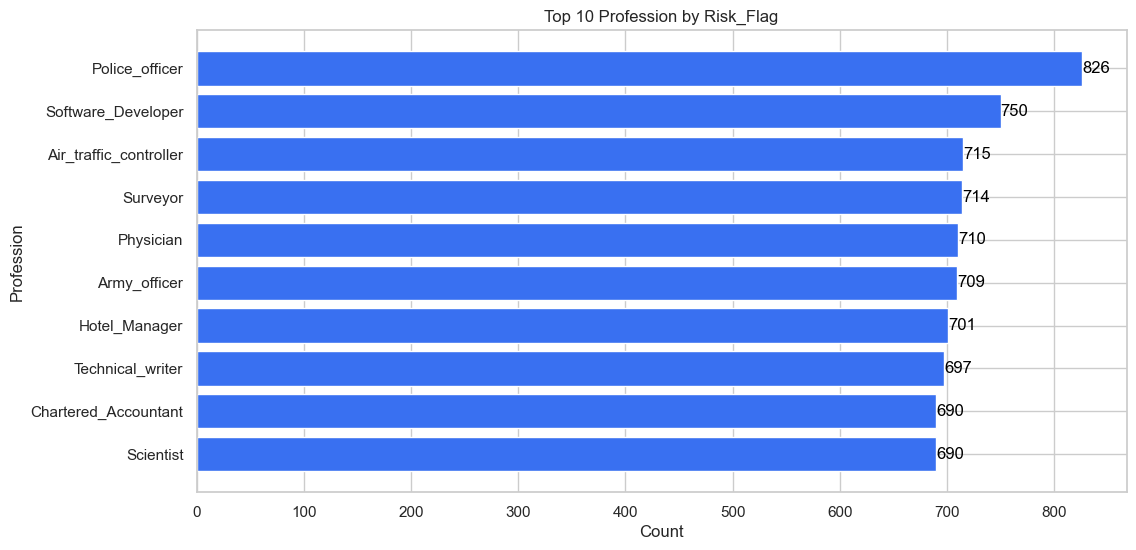

In [15]:
prof_risk_count = df.groupby('Profession')['Risk_Flag'].sum().reset_index()
prof_risk_count = prof_risk_count.sort_values(by='Risk_Flag', ascending=False).head(10)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the horizontal bar plot
bars = plt.barh(prof_risk_count['Profession'], prof_risk_count['Risk_Flag'], color='#3970F1')

# Adding labels to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f'{bar.get_width():.0f}', ha='left', va='center', color='black')

plt.xlabel('Count')
plt.ylabel('Profession')
plt.title('Top 10 Profession by Risk_Flag')
plt.gca().invert_yaxis()
plt.show()

#### Risk Rate Analysis Based on CURRENT_JOB_YRS

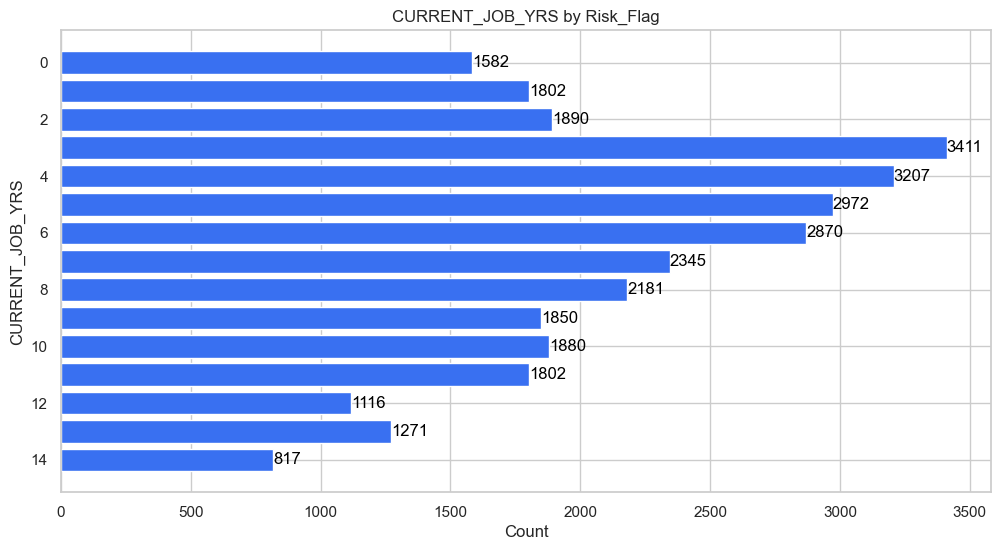

In [16]:
job_counts = df.groupby('CURRENT_JOB_YRS')['Risk_Flag'].sum().reset_index()
job_counts = job_counts.sort_values(by='Risk_Flag', ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Create the horizontal bar plot
bars = plt.barh(job_counts['CURRENT_JOB_YRS'], job_counts['Risk_Flag'], color='#3970F1')

# Adding labels to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.0f}', ha='left', va='center', color='black')

plt.xlabel('Count')
plt.ylabel('CURRENT_JOB_YRS')
plt.title('CURRENT_JOB_YRS by Risk_Flag')
plt.gca().invert_yaxis()
plt.show()


#### Risk Rate Analysis Based on Married/Single

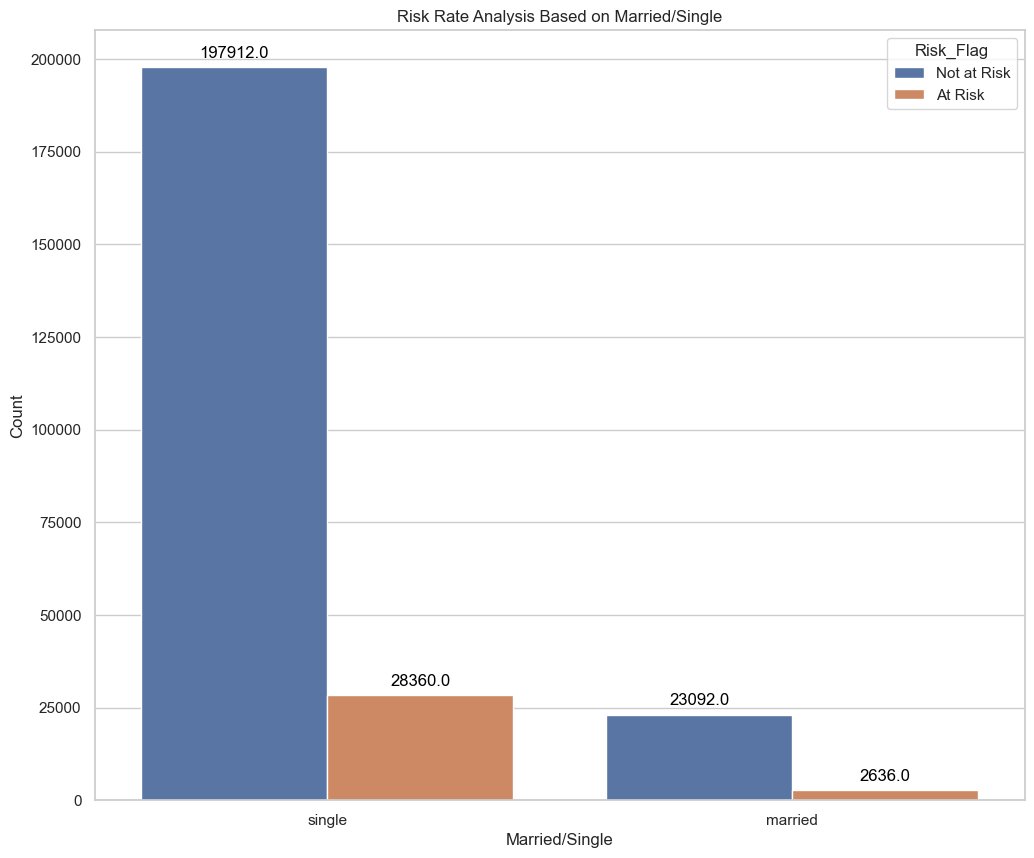

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have imported pandas and have 'df' DataFrame defined
# Also assuming 'palette' is defined

sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

ax = sns.countplot(x='Married/Single',
                   data=df,
                   hue='Risk_Flag')

plt.title('Risk Rate Analysis Based on Married/Single')
plt.xlabel('Married/Single')
plt.ylabel("Count")

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black',
                xytext=(0, 10), textcoords='offset points')

# Adding legend
legend_labels = ['Not at Risk', 'At Risk']
plt.legend(legend_labels, title="Risk_Flag")

plt.show()

## Pre-process

### Feature Encoding

#### Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Married/Single'] = label_encoder.fit_transform(df['Married/Single'])
df['Car_Ownership'] = label_encoder.fit_transform(df['Car_Ownership'])

#### One-Hot Encoding

In [26]:
Profesi_groups = {
    'tech_engineering'  : ['Industrial_Engineer', 'Air_traffic_controller', 'Architect', 'Aviator', 'Biomedical_Engineer', 'Chemical_engineer', 'Civil_engineer', 'Computer_hardware_engineer', 'Computer_operator', 'Design_Engineer', 'Engineer', 'Mechanical_engineer', 'Petroleum_Engineer', 'Software_Developer', 'Technology_specialist', 'Web_designer', 'Drafter', 'Technician', 'Surveyor', 'Technical_writer'],
    'business'          : ['Analyst', 'Chartered_Accountant', 'Economist', 'Financial_Analyst', 'Hotel_Manager','Chef'],
    'artist'            : ['Artist', 'Comedian', 'Fashion_Designer', 'Graphic_Designer', 'Designer','Dentist', 'Surgeon'],
    'social_scientist'  : ['Physician', 'Geologist', 'Microbiologist', 'Scientist', 'Statistician','Librarian', 'Magistrate'],
    'service'           : ['Consultant', 'Secretary', 'Psychologist', 'Civil_servant', 'Firefighter', 'Flight_attendant', 'Official', 'Politician','Army_officer', 'Lawyer', 'Police_officer']
}

# Buat kolom baru 'Profession Group' dan inisialisasi dengan nilai 'Other Professions'
df['Profession Group'] = 'Other Professions'

# Iterasi melalui dictionary Profesi_groups dan ubah nilai 'Profession Group' sesuai kriteria
for group, professions in Profesi_groups.items():
    df.loc[df['Profession'].isin(professions), 'Profession Group'] = group

# Lakukan one-hot encoding pada kolom 'Profession Group'
df_encoded_profesi = pd.get_dummies(df, columns=['Profession Group'], prefix=['Profession Group'])

In [28]:
State_groups = {
    'North'    : ['Chandigarh', 'Delhi', 'Haryana', 'Himachal_Pradesh', 'Jammu_and_Kashmir', 'Punjab', 'Uttar_Pradesh', 'Uttar_Pradesh[5]', 'Uttarakhand'],
    'South'    : ['Andhra_Pradesh', 'Karnataka', 'Kerala', 'Tamil_Nadu', 'Telangana', 'Puducherry'],
    'West'     : ['Gujarat', 'Maharashtra', 'Rajasthan'],
    'East'     : ['Assam', 'Bihar', 'Jharkhand', 'Odisha', 'Sikkim', 'West_Bengal'],
    'Center'   : ['Chhattisgarh', 'Madhya_Pradesh'],
    'Northeast': ['Manipur', 'Mizoram', 'Tripura']
}

# Buat kolom baru 'Region' dan inisialisasi dengan nilai 'Other'
df['Region'] = 'Other'

# Iterasi melalui dictionary State_groups dan ubah nilai 'Region' sesuai kriteria
for region, states in State_groups.items():
    df.loc[df['STATE'].isin(states), 'Region'] = region

# Lakukan one-hot encoding pada kolom 'Region'
df_encoded_state = pd.get_dummies(df, columns=['Region'], prefix=['Region'])

In [30]:
for category in ['Profession Group', 'Region']:
    onehots = pd.get_dummies(df[cat], prefix=category)
    df = df.join(onehots)

In [32]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,...,Profession Group_North,Profession Group_Northeast,Profession Group_South,Profession Group_West,Region_Center,Region_East,Region_North,Region_Northeast,Region_South,Region_West
0,1,1303834,23,3,1,rented,0,Mechanical_engineer,Rewa,Madhya_Pradesh,...,0,0,0,0,1,0,0,0,0,0
1,2,7574516,40,10,1,rented,0,Software_Developer,Parbhani,Maharashtra,...,0,0,0,1,0,0,0,0,0,1
2,3,3991815,66,4,0,rented,0,Technical_writer,Alappuzha,Kerala,...,0,0,1,0,0,0,0,0,1,0
3,4,6256451,41,2,1,rented,1,Software_Developer,Bhubaneswar,Odisha,...,0,0,0,0,0,1,0,0,0,0
4,5,5768871,47,11,1,rented,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,...,0,0,1,0,0,0,0,0,1,0


In [33]:
label_encoder = LabelEncoder()

df['Profession'] = label_encoder.fit_transform(df['Profession'])
df['STATE'] = label_encoder.fit_transform(df['STATE'])
df['CITY'] = label_encoder.fit_transform(df['CITY'])
df['House_Ownership'] = label_encoder.fit_transform(df['House_Ownership'])

In [34]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,...,Profession Group_North,Profession Group_Northeast,Profession Group_South,Profession Group_West,Region_Center,Region_East,Region_North,Region_Northeast,Region_South,Region_West
0,1,1303834,23,3,1,2,0,33,251,13,...,0,0,0,0,1,0,0,0,0,0
1,2,7574516,40,10,1,2,0,43,227,14,...,0,0,0,1,0,0,0,0,0,1
2,3,3991815,66,4,0,2,0,47,8,12,...,0,0,1,0,0,0,0,0,1,0
3,4,6256451,41,2,1,2,1,43,54,17,...,0,0,0,0,0,1,0,0,0,0
4,5,5768871,47,11,1,2,0,11,296,22,...,0,0,1,0,0,0,0,0,1,0


In [35]:
# List kolom-kolom yang ingin diubah
bool_columns = ['Profession Group_artist', 'Profession Group_business', 'Profession Group_service',
                'Profession Group_social_scientist', 'Profession Group_tech_engineering',
                'Region_Center', 'Region_East', 'Region_North', 'Region_Northeast',
                'Region_South', 'Region_West']

# Mengubah kolom-kolom tersebut menjadi tipe data integer
df[bool_columns] = df[bool_columns].astype(int)

### Handle imbalance class

In [40]:
df_encoding = df.drop(['Id', 'CITY', 'CURRENT_JOB_YRS', 'STATE', 'Profession', 'Profession Group', 'Region' ], axis=1)
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 36 columns):
 #   Column                                                                                                  Non-Null Count   Dtype
---  ------                                                                                                  --------------   -----
 0   Income                                                                                                  252000 non-null  int64
 1   Age                                                                                                     252000 non-null  int64
 2   Experience                                                                                              252000 non-null  int64
 3   Married/Single                                                                                          252000 non-null  int32
 4   House_Ownership                                                                             

In [41]:
# Creating binary target label
df_encoding['Risk_Class'] = df_encoding['Risk_Flag'] > 0.8
df_encoding['Risk_Class'].value_counts()

False    221004
True      30996
Name: Risk_Class, dtype: int64

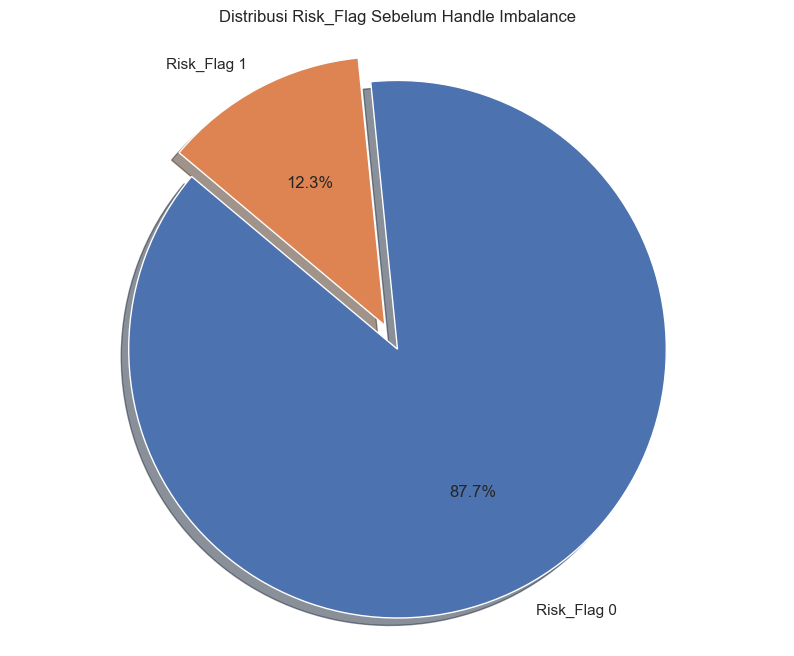

In [42]:
risk_counts = df_encoding['Risk_Flag'].value_counts()

labels = ['Risk_Flag 0', 'Risk_Flag 1']
sizes = risk_counts.values
explode = (0.1, 0)

plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode, shadow=True)
plt.title('Distribusi Risk_Flag Sebelum Handle Imbalance')
plt.axis('equal')
plt.show()

In [43]:
# separating features vs target
X = df_encoding[[col for col in df_encoding.columns if (str(df_encoding[col].dtype) != 'object') and col not in ['Risk_Flag', 'Risk_Class']]]
y = df_encoding['Risk_Class'].values
print(X.shape)
print(y.shape)

(252000, 35)
(252000,)


### SMOTE technique

In [45]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

smote = SMOTE(sampling_strategy=0.5)
X_over_SMOTE, y_over_SMOTE = smote.fit_resample(X, y)

print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

SMOTE
False    221004
True     110502
dtype: int64


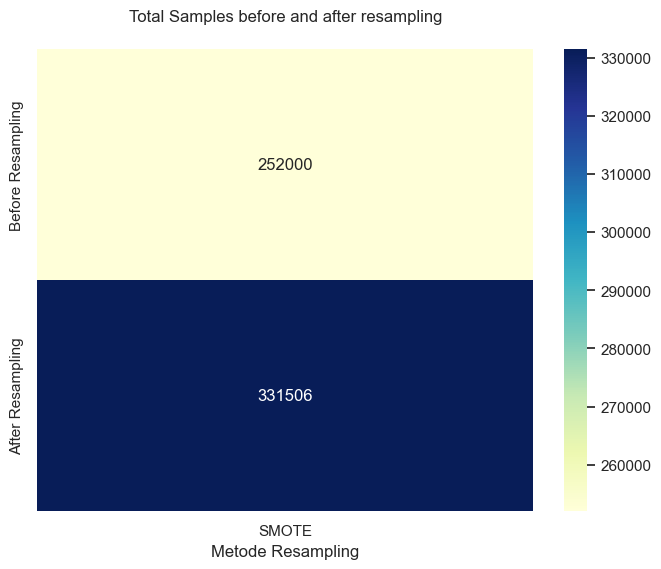

In [51]:
# Data jumlah sampel sebelum dan setelah resampling
df_resampling = {
    'Metode Resampling': ['SMOTE'],
    'Before Resampling': [len(y)],
    'After Resampling': [len(y_over_SMOTE)]
}

# Membuat DataFrame dari data resampling
df_resampling = pd.DataFrame(df_resampling)

# Membuat heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(df_resampling.set_index('Metode Resampling').T, annot=True, cmap='YlGnBu', fmt='g')
heatmap.set_title('Total Samples before and after resampling', pad=20)
plt.show()

## New dataframe after resampling

In [53]:
# new dataframe after resampling
data_new = pd.DataFrame(X_over_SMOTE, columns=df_encoding.drop(columns=['Risk_Class']).columns)
data_new['Risk_Class'] = y_over_SMOTE
data_new['Risk_Class'].value_counts()

False    221004
True     110502
Name: Risk_Class, dtype: int64

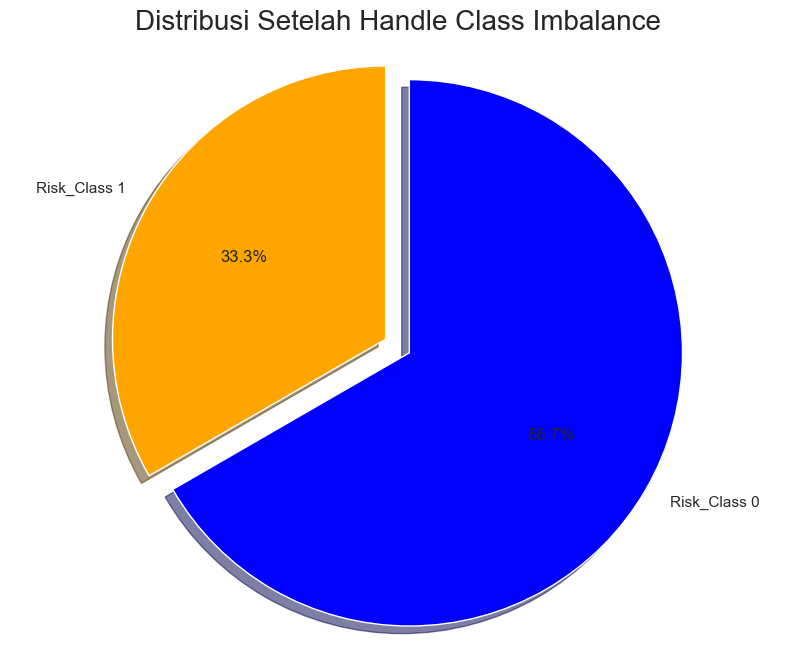

In [54]:
labels = 'Risk_Class 1', 'Risk_Class 0'
sizes = [data_new.Risk_Class[data_new['Risk_Class']==1].count(), data_new.Risk_Class[data_new['Risk_Class']==0].count()]
colors = ['orange', 'blue']
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')
plt.title("Distribusi Setelah Handle Class Imbalance", size = 20)
plt.show()

### Feature Engineering

In [55]:
data_new = data_new.drop(columns=['Risk_Flag'])

In [56]:
feature = data_new.iloc[:, :-1]
target = data_new['Risk_Class']

#### Split Dataset

In [57]:
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [58]:
print(feature_train.shape)
print(feature_test.shape)
print(target_train.shape)
print(target_test.shape)

(265204, 35)
(66302, 35)
(265204,)
(66302,)


## Modelling

In [60]:
data = data_new
X = data.drop(columns=['Risk_Class'])
y = data['Risk_Class']

### Split dataset

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Libraries

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

In [64]:
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(RandomForestClassifier(), X, y, cv=5, scoring='recall', return_train_score=True)
    print('recall (crossval train): '+ str(score['train_score'].mean()))
    print('recall (crossval test): '+ str(score['test_score'].mean()))

### Fit Random Forest Model

In [65]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

### Visualization

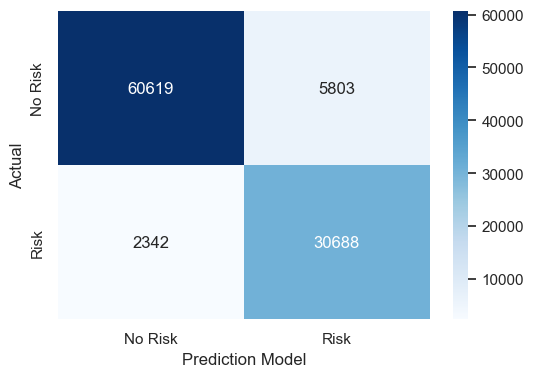

In [67]:
#visualisasi confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf_model.predict(X_test)
confusion_mat = confusion_matrix(y_test, y_pred)

#heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediction Model')
plt.ylabel('Actual')
class_names = ['No Risk', 'Risk']
tick_marks = [0.5, 1.5]
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

plt.show()

### Evaluation

In [69]:
eval_classification(rf_model)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.84
Recall (Test Set): 0.93
F1-Score (Test Set): 0.88
roc_auc (test-proba): 0.96
roc_auc (train-proba): 0.97
recall (crossval train): 0.9977330676064942
recall (crossval test): 0.9269865240224793


### Learning Curve

param value: 1; train: 0.9737049913518495; test: 0.9642698797684688
param value: 3; train: 0.9705756452621314; test: 0.9635468340471656
param value: 5; train: 0.9690066456085453; test: 0.9621341923405675
param value: 7; train: 0.9679259489806866; test: 0.9610032814525585
param value: 9; train: 0.9674068749653933; test: 0.9603350951032978
param value: 12; train: 0.9667084188897047; test: 0.9591036057371425
param value: 14; train: 0.9661819448115857; test: 0.9583032212324589
param value: 16; train: 0.9653865900103543; test: 0.9572671996873394
param value: 18; train: 0.964222858726408; test: 0.9558583958623152
param value: 21; train: 0.962141232572534; test: 0.953965739550253
param value: 23; train: 0.9611160146427526; test: 0.9533345420381264
param value: 25; train: 0.9604992339376204; test: 0.9530202961125277
param value: 27; train: 0.9596978757261905; test: 0.9523307842233313
param value: 29; train: 0.9590462606624768; test: 0.9521243182734951
param value: 32; train: 0.9584831804826545

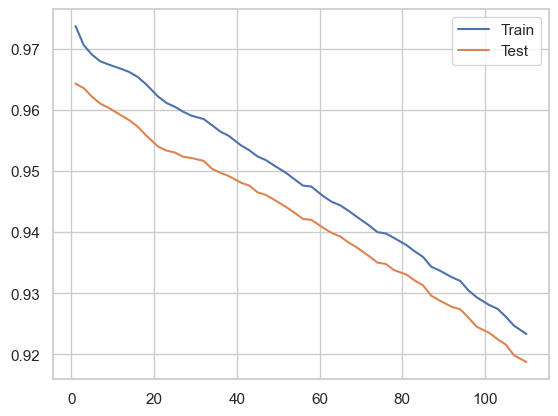

In [71]:
#learning curve
param_values = [int(x) for x in np.linspace(1, 110, 50)]

train_scores = []
test_scores = []

for c in param_values:
  model = RandomForestClassifier(n_estimators=110, min_samples_leaf=c)
  model.fit(X_train, y_train)

  # eval on train
  y_pred_train_proba = model.predict_proba(X_train)
  train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
  train_scores.append(train_auc)

  # eval on test
  y_pred_proba = model.predict_proba(X_test)
  test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
  test_scores.append(test_auc)

  print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))


plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

### Hyperparameter Tuning
(It doesn't have any significant changes, so I didn't run it again)

In [ ]:
hyperparameters = {
    'n_estimators': [1, 110],
    'max_depth': [1, 30],
    'min_samples_split': [1, 10],
    'min_samples_leaf': [1, 10]
}

In [ ]:
# Inisialisasi Model
rf_model = RandomForestClassifier(random_state=42)
model = GridSearchCV(dt_model, hyperparameters, cv=5, scoring='recall')
model.fit(X_train, y_train)

#### Predict & Evaluation

In [ ]:
y_pred = model.predict(X_test)
eval_classification(model)

#### Check the best hyperparameter after tuning

In [ ]:
# Lakukan pencarian hiperparameter pada data pelatihan
model.fit(X_train, y_train)

# Dapatkan model terbaik, parameter terbaik, dan skor terbaik
best_model = model.best_estimator_
best_params = model.best_params_
best_score = model.best_score_

# Cetak hasilnya
print("Best Model:", best_model)
print("Best Parameters:", best_params)
print("Best Score:", best_score)

**Result:**

Best Model: RandomForestClassifier(max_depth=30, 
                        min_samples_split=10, 
                        n_estimators=110,
                        random_state=42)

Best Parameters: {'max_depth': 30, 
                'min_samples_leaf': 1, 
                'min_samples_split': 10, 
                'n_estimators': 110}

Best Score: 0.9320270720290065

### Feature Importance

In [72]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 6))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')
    plt.show()

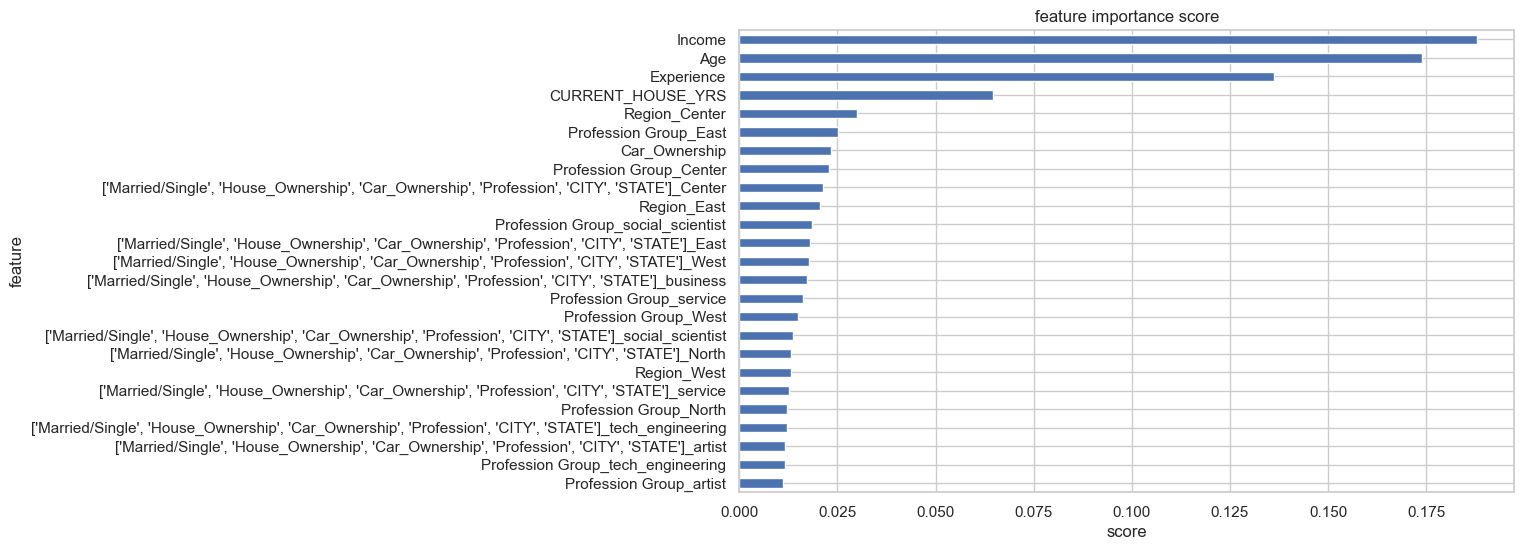

In [74]:
# show_feature_importance(model.best_estimator_)
show_feature_importance(model)